# Support Vector Machine (SVM) 
It is a powerful and versatile machine learning algorithm primarily used for classification tasks, but it can also be used for regression. SVM aims to find the optimal hyperplane that best separates the data points of different classes in the feature space.

### Key Concepts of SVM
Hyperplane:

In an n-dimensional space, a hyperplane is a flat affine subspace of dimension (n-1) that separates the space into two half-spaces. For a 2-dimensional space, the hyperplane is a line; for a 3-dimensional space, it is a plane.

#### Support Vectors:

Support vectors are the data points that are closest to the hyperplane and influence its position and orientation. These are the critical elements of the training set.
Margin:

The margin is the distance between the hyperplane and the nearest data points from either class. SVM aims to maximize this margin to achieve better generalization.
#### Kernel Trick:

The kernel trick allows SVM to handle non-linearly separable data by transforming the original feature space into a higher-dimensional space where a linear hyperplane can separate the classes. 
Common kernels include:
Linear Kernel: Suitable for linearly separable data.
Polynomial Kernel: Allows for curved decision boundaries.
Radial Basis Function (RBF) Kernel: Suitable for more complex, non-linear data.
Sigmoid Kernel: Similar to a neural network's activation function.
How SVM Works
#### Linear SVM:

For linearly separable data, SVM finds a hyperplane that separates the classes with the maximum margin. The hyperplane is defined by the equation 
𝑤⋅𝑥+𝑏=0
w⋅x+b=0, where 
𝑤
w is the weight vector and 
𝑏
b is the bias.

#### Non-Linear SVM:

For non-linearly separable data, SVM uses kernel functions to map the data into a higher-dimensional space where a linear hyperplane can separate the classes. This is known as the "kernel trick."

#### Soft Margin SVM:

SVM can handle cases where classes are not perfectly separable by introducing slack variables that allow some misclassification. The goal is to find a balance between maximizing the margin and minimizing classification errors. This is controlled by a regularization parameter 𝐶.


### Linear Kernel: 
Used when the data is linearly separable.
### Non-Linear Kernel: 
Used when the data is not linearly separable, with RBF being a common choice.
### Kernel Trick: 
Allows SVMs to perform classification in a higher-dimensional space without explicitly computing the transformation.

In [196]:
#import necessarey libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.feature_selection import RFE # for recusivly selecting the best features for prediction
import seaborn as sns # for correlation analysis
import matplotlib.pyplot as plt # for corelation analysis



In [197]:
# Load the dataset
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
df=pd.read_csv(r'D:\Surya files\DataScience\ML\Classification\SVM\heartDiseaseDetection\input\processed.cleveland.data',header=None,names=column_names)

In [198]:
df.to_csv(r'D:\Surya files\DataScience\ML\Classification\SVM\heartDiseaseDetection\input\processed_cleveland.csv',index=False)

In [199]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [200]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [201]:
print(f'{len(df.columns)} columns are there in that given data set')

14 columns are there in that given data set


The data you provided is from the Heart Disease UCI dataset, specifically the "processed.cleveland.data" file. Each row represents a patient's record with various medical attributes and the target variable indicating the presence of heart disease. Here’s a breakdown of what each column represents:

Age: Age of the patient in years.
Sex: Sex of the patient (1 = male; 0 = female).
cp: Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).
trestbps: Resting blood pressure (in mm Hg on admission to the hospital).
chol: Serum cholesterol in mg/dl.
fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
restecg: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy).
thalach: Maximum heart rate achieved.
exang: Exercise induced angina (1 = yes; 0 = no).
oldpeak: ST depression induced by exercise relative to rest.
slope: The slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
ca: Number of major vessels (0-3) colored by fluoroscopy.
thal: Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect).
target: Diagnosis of heart disease (0 = no heart disease, 1-4 = presence of heart disease).


### input:
63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0


### input explanation:
63.0: Age is 63 years.

1.0: Male.

1.0: Chest pain type is typical angina.

145.0: Resting blood pressure is 145 mm Hg.

233.0: Serum cholesterol is 233 mg/dl.

1.0: Fasting blood sugar > 120 mg/dl (true).

2.0: Resting electrocardiographic results show probable or definite left ventricular hypertrophy.

150.0: Maximum heart rate achieved is 150 bpm.

0.0: No exercise induced angina.

2.3: ST depression induced by exercise relative to rest is 2.3.

3.0: The slope of the peak exercise ST segment is downsloping.

0.0: No major vessels colored by fluoroscopy.

6.0: Thalassemia is fixed defect.

0: No heart disease (target variable).




In [202]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [203]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


## Preprocessing the data

In [204]:
#confirming if there are null values are there or not
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [206]:
df.empty

False

### checking if ? is there in the given dataframe to replace

In [207]:
if '?' in df.values:
    print('? is there in the df')
else:
    print('? is not present in the  df')


? is there in the df


In [208]:
df.iloc[72:74]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
72,62.0,1.0,4.0,120.0,267.0,0.0,0.0,99.0,1.0,1.8,2.0,2.0,7.0,1
73,65.0,1.0,4.0,110.0,248.0,0.0,2.0,158.0,0.0,0.6,1.0,2.0,6.0,1


In [209]:
df.replace('?', np.nan, inplace=True)

In [210]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [211]:
for col in df.columns:
    if df[col].isnull().any():
        print(f"Column {col} has null values:")
        print(df[df[col].isnull()])

Column ca has null values:
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
166  52.0  1.0  3.0     138.0  223.0  0.0      0.0    169.0    0.0      0.0   
192  43.0  1.0  4.0     132.0  247.0  1.0      2.0    143.0    1.0      0.1   
287  58.0  1.0  2.0     125.0  220.0  0.0      0.0    144.0    0.0      0.4   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  target  
166    1.0  NaN  3.0       0  
192    2.0  NaN  7.0       1  
287    2.0  NaN  7.0       0  
302    1.0  NaN  3.0       0  
Column thal has null values:
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
87   53.0  0.0  3.0     128.0  216.0  0.0      2.0    115.0    0.0      0.0   
266  52.0  1.0  4.0     128.0  204.0  1.0      0.0    156.0    1.0      1.0   

     slope   ca thal  target  
87     1.0  0.0  NaN       0  
266    2.0  0.0  NaN       2  


In [212]:
df.iloc[87]

age          53.0
sex           0.0
cp            3.0
trestbps    128.0
chol        216.0
fbs           0.0
restecg       2.0
thalach     115.0
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          NaN
target          0
Name: 87, dtype: object

In [232]:
df.iloc[87]

age          53.0
sex           0.0
cp            4.0
trestbps    138.0
chol        234.0
fbs           0.0
restecg       2.0
thalach     160.0
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          3.0
target          0
Name: 88, dtype: object

In [213]:
len(df)

303

In [214]:
# drop the columns with null values
df.dropna(inplace=True)

In [233]:
df.iloc[87]

age          53.0
sex           0.0
cp            4.0
trestbps    138.0
chol        234.0
fbs           0.0
restecg       2.0
thalach     160.0
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          3.0
target          0
Name: 88, dtype: object

In [215]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [216]:
df['target'].value_counts()

0    160
1     54
2     35
3     35
4     13
Name: target, dtype: int64

### converting the target to binarey for simlcity o means no heart disese adn 1 means heart disease 
Why Simplify to Binary?
Simpler Models: Binary classification models are generally simpler to implement and interpret.
Focus on Detection: Often, the primary concern is whether a patient has any form of heart disease or not, rather than the specific type or severity.
Improved Performance: Many models perform better and are easier to optimize on binary problems compared to multi-class problems.

In [217]:
df['target']=df['target'].apply(lambda x: 1 if x>0 else 0)

In [218]:
df['target'].value_counts()

0    160
1    137
Name: target, dtype: int64

## corelation analysis for feature selection
features can be selected by
Filter Method: Use the correlation values to filter out features.
Wrapper Method: Use Recursive Feature Elimination (RFE) to select the best subset of features.
Embedded Method: Use algorithms that have built-in feature selection like Lasso, Ridge, or tree-based methods.

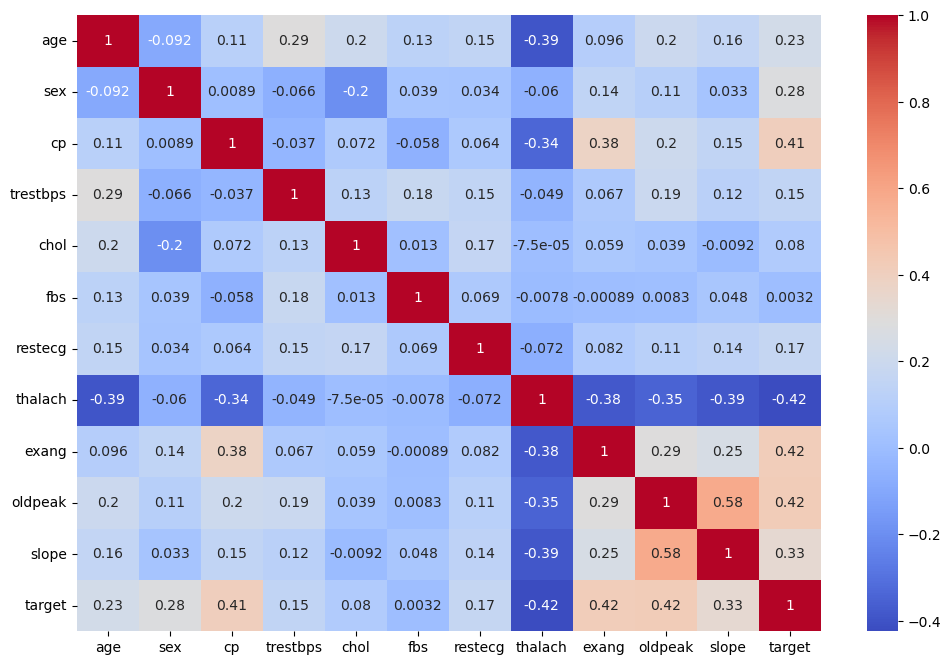

target      1.000000
oldpeak     0.424052
exang       0.421355
cp          0.408945
slope       0.333049
sex         0.278467
age         0.227075
restecg     0.166343
trestbps    0.153490
chol        0.080285
fbs         0.003167
thalach    -0.423817
Name: target, dtype: float64


In [235]:
#compute the corelation matrix
corr=df.corr()
# print(corr)

# print the heatmap

plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

#pinting the corelation with the target variable
print(corr['target'].sort_values(ascending=False))


In [220]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## classifying the data by selecting top 5 features

In [236]:
# Select features based on high correlation values
selected_features = ['oldpeak', 'exang', 'cp', 'slope', 'sex']

In [237]:
X=df[selected_features]
y=df['target']

In [238]:
X.tail(5)

,oldpeak,exang,cp,slope,sex
297,0.2,1.0,4.0,2.0,0.0
298,1.2,0.0,1.0,2.0,1.0
299,3.4,0.0,4.0,2.0,1.0
300,1.2,1.0,4.0,2.0,1.0
301,0.0,0.0,2.0,2.0,0.0


In [239]:
y.tail()

297    1
298    1
299    1
300    1
301    1
Name: target, dtype: int64

In [240]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [241]:
# creating a svm classifier
svm_model=SVC(kernel='linear',random_state=42)
svm_model.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [242]:
predictions=svm_model.predict(X_test)
accurecy=accuracy_score(y_test,predictions)



In [228]:
print(f'Accuracy: {accurecy * 100:.2f}%')

print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Accuracy: 83.33%
Confusion Matrix:
 [[32  4]
 [ 6 18]]


In [229]:
print("Classification Report:\n", classification_report(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        36
           1       0.82      0.75      0.78        24

    accuracy                           0.83        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.83      0.83      0.83        60



In [230]:
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Confusion Matrix:
 [[32  4]
 [ 6 18]]


In [231]:
# #correlation output
# # target      1.000000
# # oldpeak     0.424052
# # exang       0.421355
# # cp          0.408945
# # slope       0.333049
# # sex         0.278467
# # age         0.227075
# # restecg     0.166343
# # trestbps    0.153490
# # chol        0.080285
# # fbs         0.003167
# # thalach    -0.423817


# #getting the selected features
# selected_features=X.columns[rfe.support_]
# print(selected_features)